/var/folders/9x/pl6xkyb97g577_b0bygc91lw0000gn/T/ipykernel_46614/487087913.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['construction_year'].replace(0, pd.NA, inplace=True)


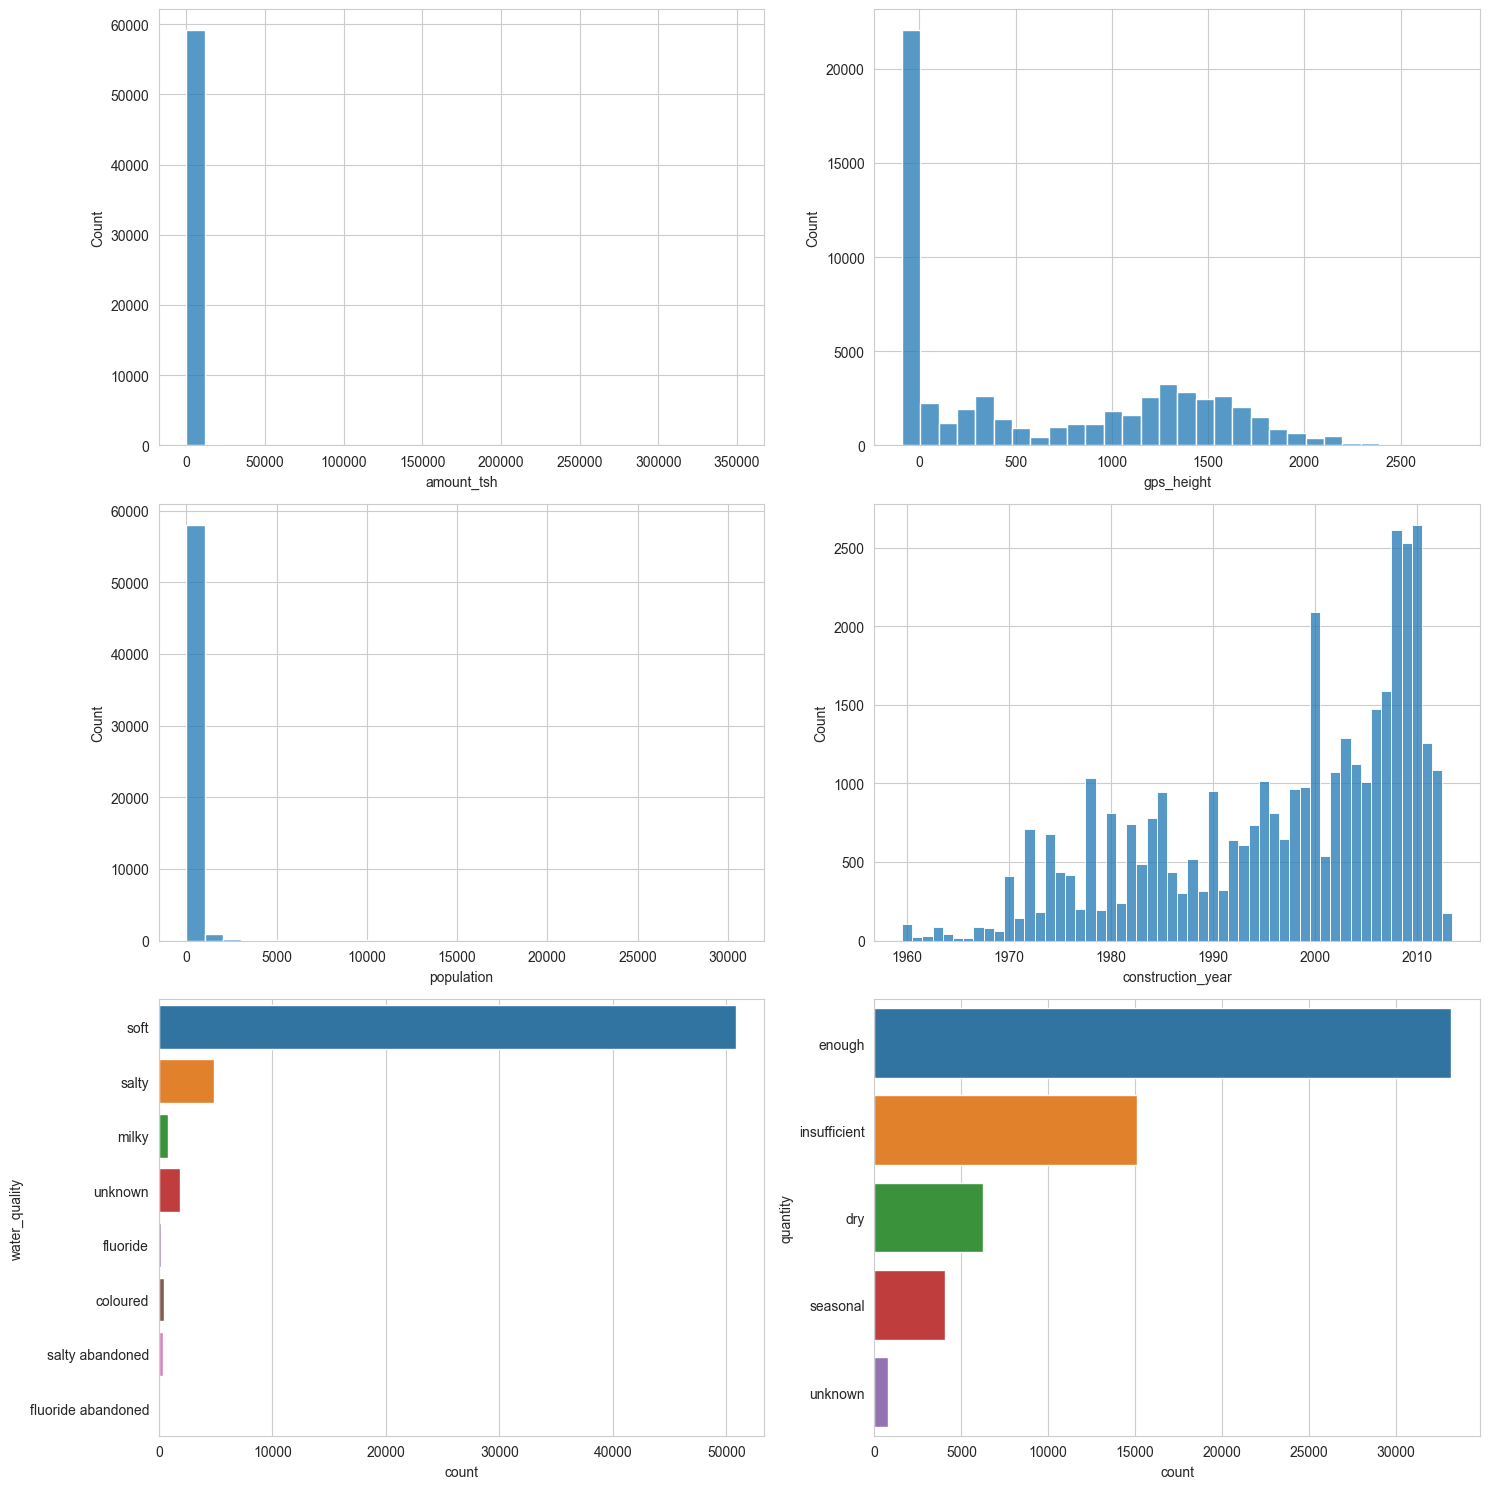

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data_path = 'Train.csv'
train_labels_path = 'Train_Labels.csv'

# Reading the data
train_data = pd.read_csv(train_data_path)
train_labels = pd.read_csv(train_labels_path)

# Merging the labels with the data for a comprehensive analysis
merged_data = pd.merge(train_data, train_labels, on='id')

# Selecting a subset of columns for initial exploratory analysis
columns_to_explore = ['amount_tsh', 'gps_height', 'population', 'construction_year', 'water_quality', 'quantity', 'status_group']

# Creating a subset dataframe for exploration
subset_data = merged_data[columns_to_explore]

# Handling the zero values in 'construction_year' by replacing them with NaN
subset_data['construction_year'].replace(0, pd.NA, inplace=True)

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions and counts
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plotting histograms for continuous variables
sns.histplot(data=subset_data, x='amount_tsh', bins=30, ax=axes[0, 0])
sns.histplot(data=subset_data, x='gps_height', bins=30, ax=axes[0, 1])
sns.histplot(data=subset_data, x='population', bins=30, ax=axes[1, 0])
sns.histplot(data=subset_data, x='construction_year', bins=30, ax=axes[1, 1])

# Plotting count plots for categorical variables
sns.countplot(data=subset_data, y='water_quality', ax=axes[2, 0])
sns.countplot(data=subset_data, y='quantity', ax=axes[2, 1])

# Adjusting the layout
plt.tight_layout()

# Showing the plots
plt.show()


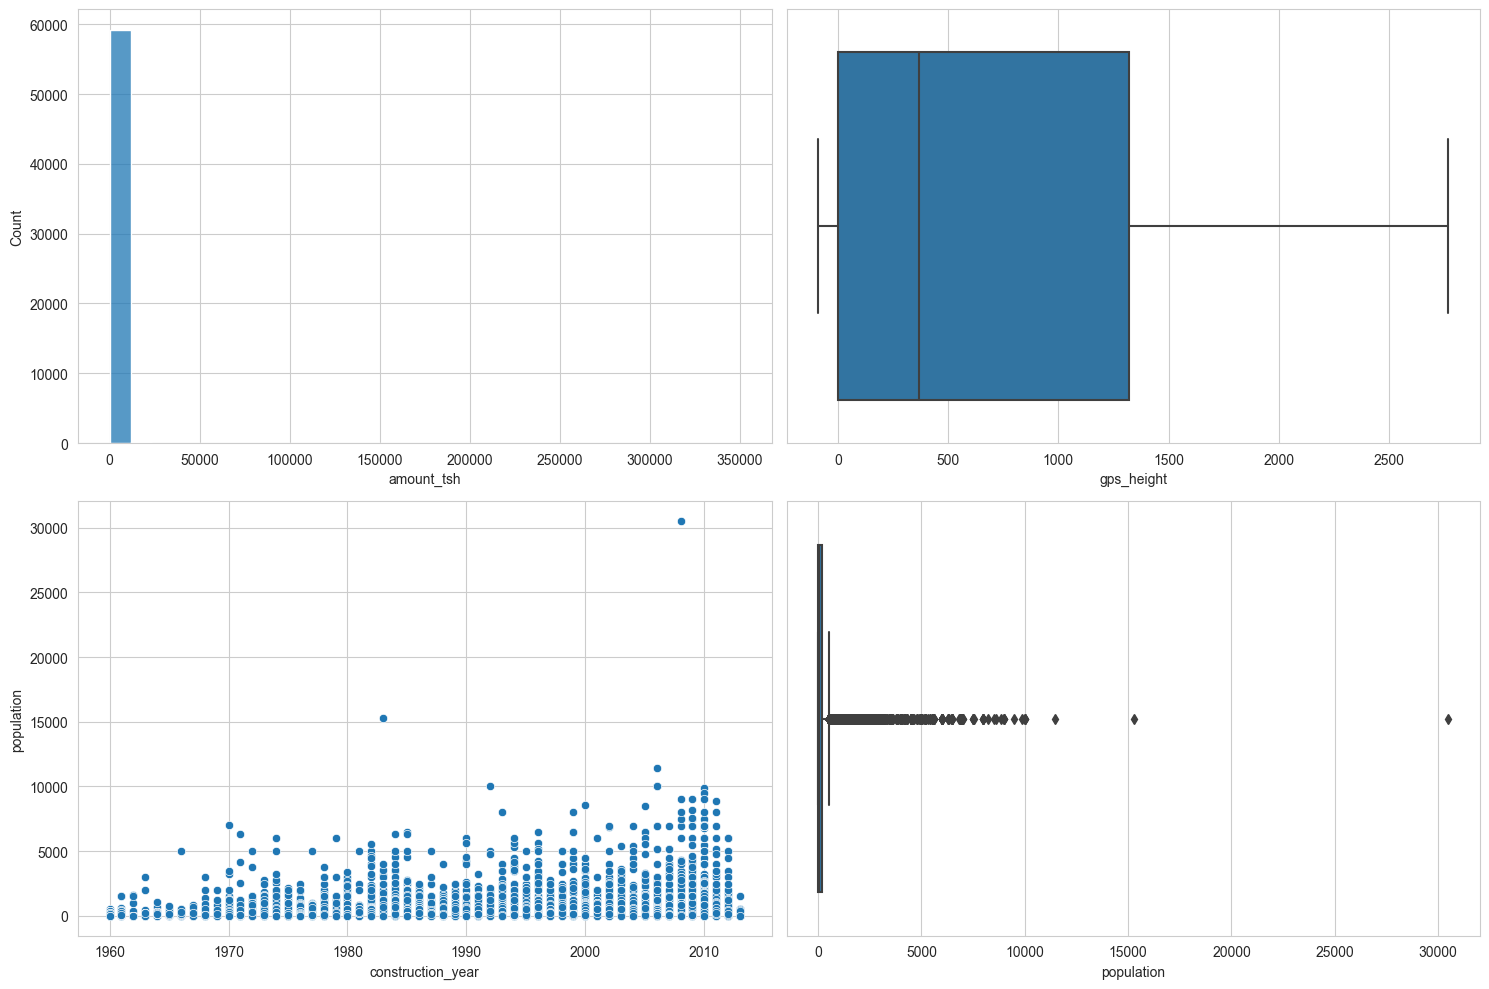

(          amount_tsh    gps_height    population
 count   59400.000000  59400.000000  59400.000000
 mean      317.650385    668.297239    179.909983
 std      2997.574558    693.116350    471.482176
 min         0.000000    -90.000000      0.000000
 25%         0.000000      0.000000      0.000000
 50%         0.000000    369.000000     25.000000
 75%        20.000000   1319.250000    215.000000
 max    350000.000000   2770.000000  30500.000000,
 {'water_quality': water_quality
  soft                  50818
  salty                  4856
  unknown                1876
  milky                   804
  coloured                490
  salty abandoned         339
  fluoride                200
  fluoride abandoned       17
  Name: count, dtype: int64,
  'quantity': quantity
  enough          33186
  insufficient    15129
  dry              6246
  seasonal         4050
  unknown           789
  Name: count, dtype: int64,
  'status_group': status_group
  functional                 32259
  non fun

In [2]:
# Descriptive Statistics
# Calculating summary statistics for numerical features
numerical_summary = subset_data.describe()

# Calculating value counts for categorical variables
categorical_columns = ['water_quality', 'quantity', 'status_group']
categorical_summary = {col: subset_data[col].value_counts() for col in categorical_columns}

# Plotting distributions with histograms, box plots, and scatter plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Histogram for amount_tsh
sns.histplot(data=subset_data, x='amount_tsh', bins=30, ax=axes[0, 0])

# Box plot for gps_height
sns.boxplot(data=subset_data, x='gps_height', ax=axes[0, 1])

# Scatter plot for population vs construction_year
sns.scatterplot(data=subset_data, x='construction_year', y='population', ax=axes[1, 0])

# Box plot for population
sns.boxplot(data=subset_data, x='population', ax=axes[1, 1])

# Adjusting the layout
plt.tight_layout()

# Showing the plots
plt.show()

numerical_summary, categorical_summary




### Descriptive Statistics:

- **Numerical Features**:
  - `amount_tsh`: Mean is 317.65, but with a high standard deviation of 2997.57, indicating wide variance.
  - `gps_height`: Average altitude is 668.30 with a standard deviation of 693.12.
  - `population`: Mean population around the well is 179.91, but varies significantly (std: 471.48).

- **Categorical Features**:
  - `water_quality`: Most common is 'soft', followed by 'salty'.
  - `quantity`: 'Enough' is the most frequent category.
  - `status_group`: Majority of the waterpoints are 'functional'.

### Visualizations:

- **Histogram for `amount_tsh`**: Shows the distribution of total static head.
- **Box Plot for `gps_height`**: Provides insight into the altitude range and outliers.
- **Scatter Plot (Construction Year vs Population)**: Helps in understanding any relationship between the year of construction and the population size.
- **Box Plot for `population`**: Highlights the spread and outliers in population size around waterpoints.

These insights can guide further data preprocessing and feature engineering steps. For example, the large variance in `amount_tsh` and `population` may necessitate normalization or transformation. The scatter plot and box plots help in identifying outliers and understanding the distribution of key numerical variables.

/var/folders/9x/pl6xkyb97g577_b0bygc91lw0000gn/T/ipykernel_46614/883316899.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['construction_year'].replace(0, pd.NA, inplace=True)


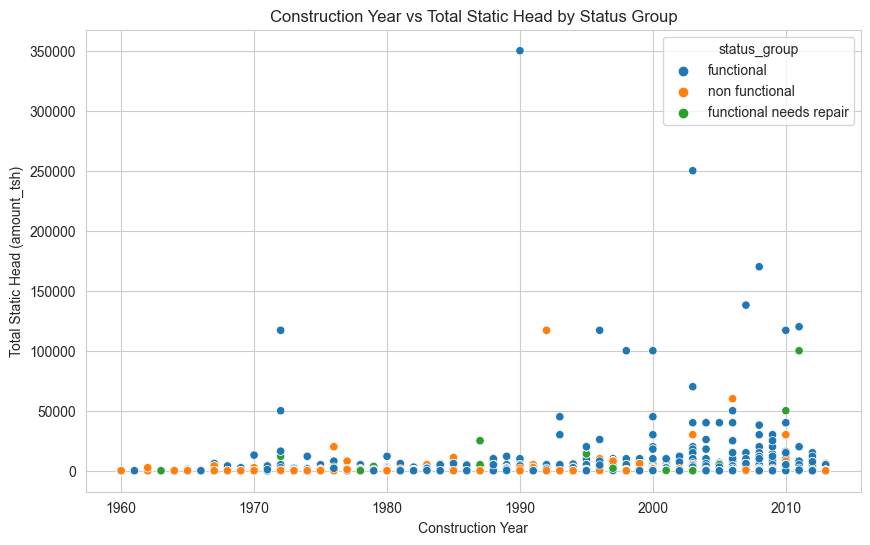

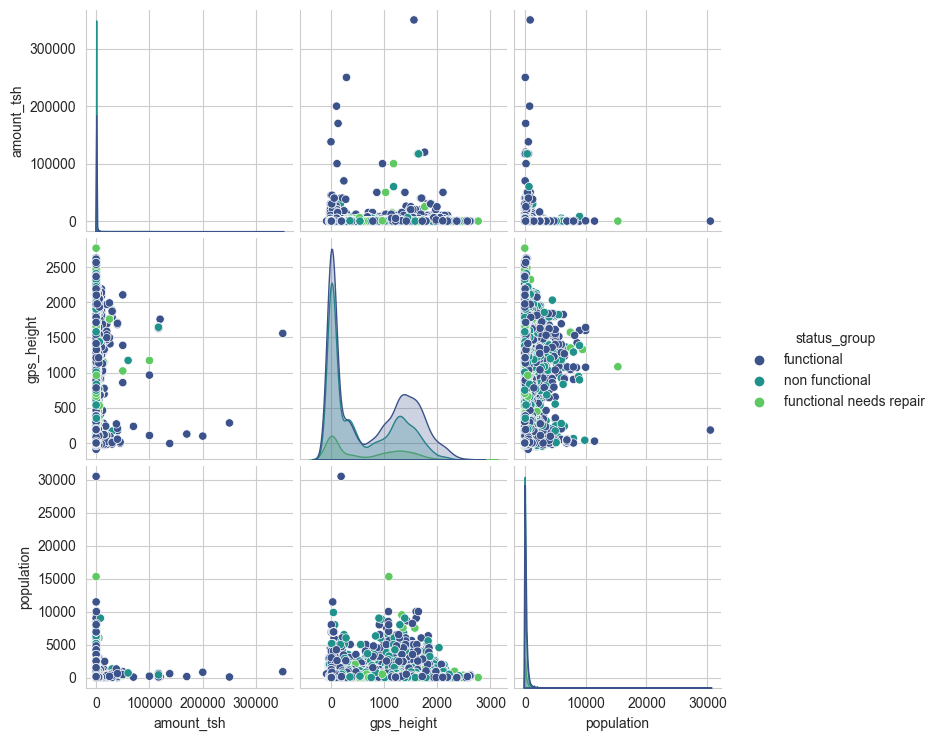

TypeError: float() argument must be a string or a real number, not 'NAType'

<Figure size 1000x800 with 0 Axes>

In [6]:
# Merging the labels with the data for a comprehensive analysis
merged_data = pd.merge(train_data, train_labels, on='id')

# Selecting a subset of columns for initial exploratory analysis
columns_to_explore = ['amount_tsh', 'gps_height', 'population', 'construction_year', 'water_quality', 'quantity', 'status_group']
subset_data = merged_data[columns_to_explore]
subset_data['construction_year'].replace(0, pd.NA, inplace=True)

# Scatter Plot (Construction Year vs Total Static Head)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_data, x='construction_year', y='amount_tsh', hue='status_group')
plt.title('Construction Year vs Total Static Head by Status Group')
plt.xlabel('Construction Year')
plt.ylabel('Total Static Head (amount_tsh)')
plt.show()

# Pair Plot for selected features
selected_features = ['amount_tsh', 'gps_height', 'population', 'construction_year', 'status_group']
sns.pairplot(subset_data[selected_features], hue='status_group', palette='viridis')
plt.show()

# Heatmap (Correlation Matrix)
plt.figure(figsize=(10, 8))
correlation_matrix = subset_data.drop(['status_group'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Bar Chart (Water Quality)
plt.figure(figsize=(10, 6))
sns.countplot(data=subset_data, x='water_quality', hue='status_group', palette='Set2')
plt.title('Water Quality Counts by Status Group')
plt.xticks(rotation=45)
plt.show()

# Pie Chart (Status Group Distribution)
status_group_counts = subset_data['status_group'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(status_group_counts, labels=status_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Waterpoint Status Groups')
plt.show()

In [11]:



print("\nSummary Statistics:", merged_data.describe())

print('\n')
print('Length for train Table:',len(merged_data))
print('\n')
 
print('\n')
print("train Unique Values:",'\n',merged_data[merged_data.columns].nunique())
print('\n')
 
print('Null Columns: ',len(merged_data.columns[merged_data.isnull().sum() >1] ))
print('\n')
print('Percentage of Zero Columns: ','\n',(merged_data == 0).astype(int).sum(axis=0)/len(merged_data)*100)
print('\n')
#print("train Table Null Values:",'\n',train[train.columns].isnull().sum() ) 

print("Percentage of Null Columns:",'\n',(merged_data.isnull()).astype(int).sum(axis=0)/len(merged_data)*100 ) 


Summary Statistics:                  id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.4821

In [4]:
merged_data.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [14]:
# Function to check and print unique features in each column
def print_unique_features(df):
    for column in df.columns:
        unique_features = df[column].unique()
        if len(unique_features) > 20:
            print(f"Column '{column}' has {len(unique_features)} unique features.")
            print('\n')
        else:
            print(f"Column '{column}' has {len(unique_features)} unique features -> {unique_features}")
            print('\n')

# Using the function on the DataFrame
print_unique_features(merged_data)

Column 'id' has 59400 unique features.


Column 'amount_tsh' has 98 unique features.


Column 'date_recorded' has 356 unique features.


Column 'funder' has 1897 unique features.


Column 'gps_height' has 2428 unique features.


Column 'installer' has 2146 unique features.


Column 'longitude' has 57516 unique features.


Column 'latitude' has 57517 unique features.


Column 'wpt_name' has 37400 unique features.


Column 'num_private' has 65 unique features.


Column 'basin' has 9 unique features -> ['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']


Column 'subvillage' has 19288 unique features.


Column 'region' has 21 unique features.


Column 'region_code' has 27 unique features.


Column 'district_code' has 20 unique features -> [ 5  2  4 63  1  8  3  6 43  7 23 33 53 62 60 30 13  0 80 67]


Column 'lga' has 125 unique features.


Column 'ward' has 2092 unique features.


Column 'population' has 104

In [10]:
merged_data.columns.tolist()

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

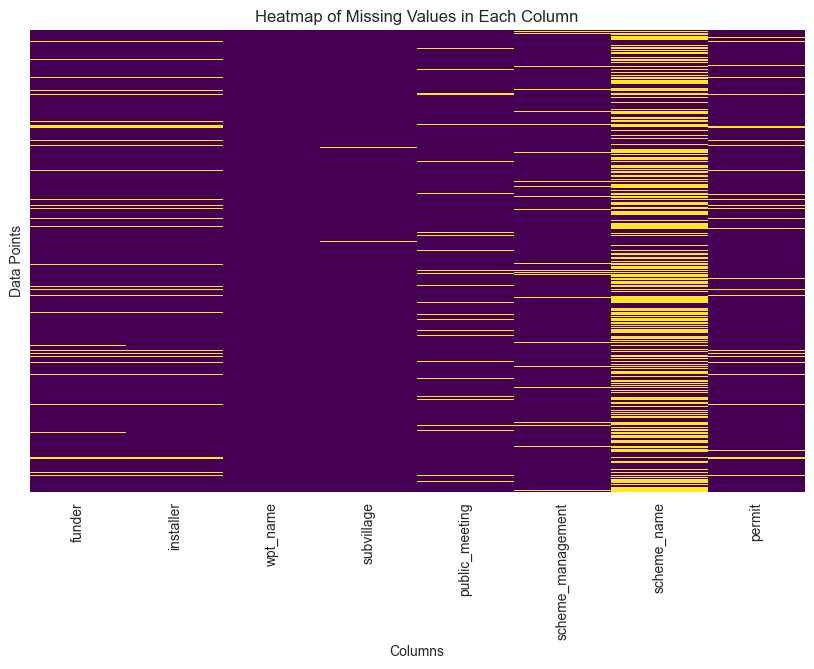

funder                3637
installer             3655
wpt_name                 2
subvillage             371
public_meeting        3334
scheme_management     3878
scheme_name          28810
permit                3056
dtype: int64

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the number of missing values in each column
missing_values = merged_data.isnull().sum()

# Filtering out columns that have no missing values for the heatmap
missing_values = missing_values[missing_values > 0]

# Creating a heatmap for visualizing the missing data
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data[missing_values.index].isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Data Points')
plt.show()

missing_values



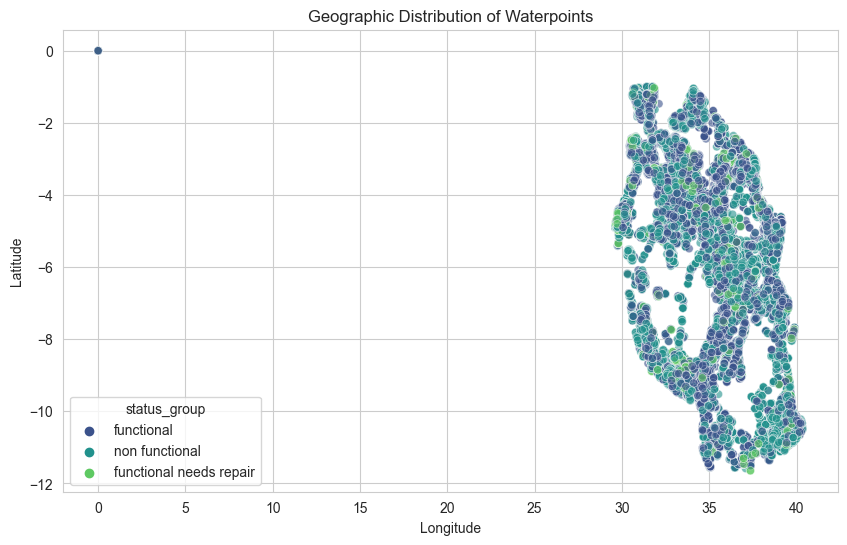

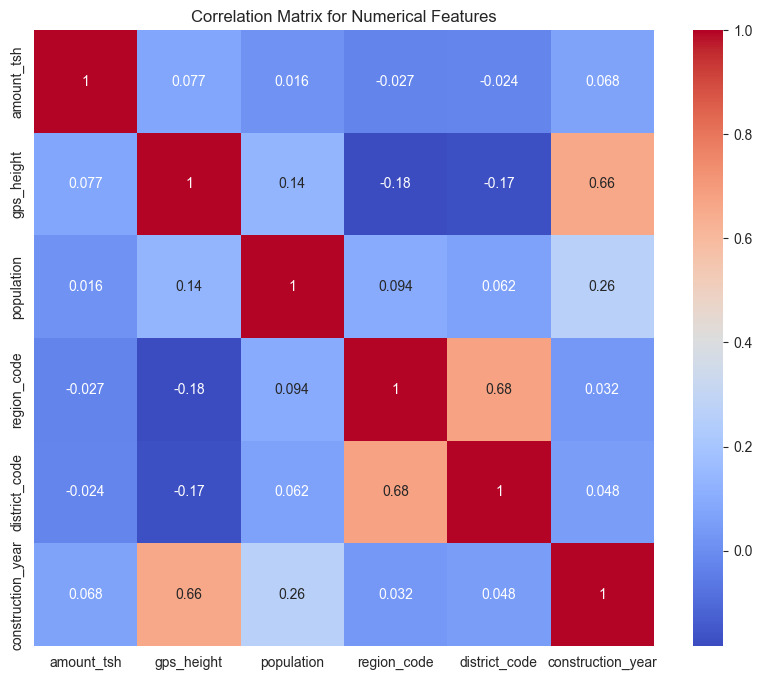

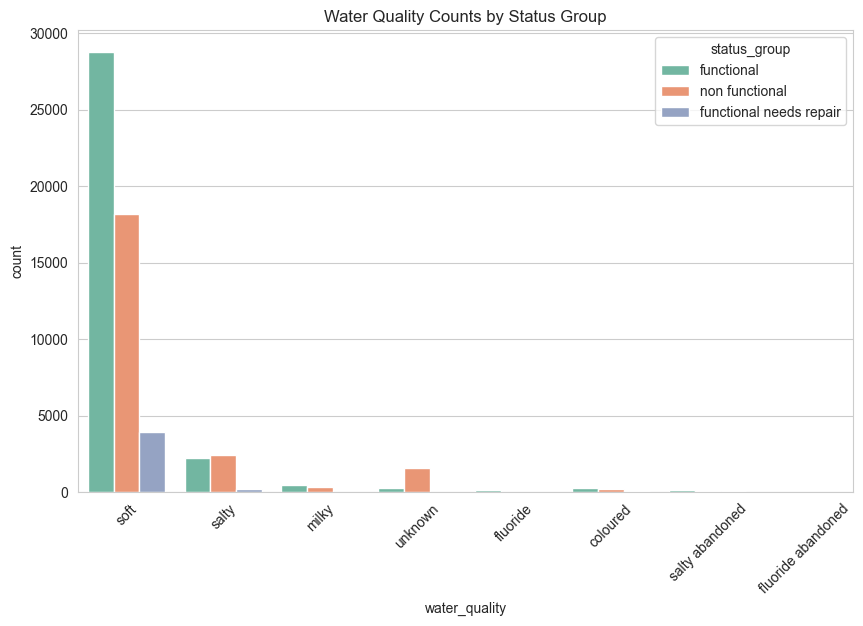

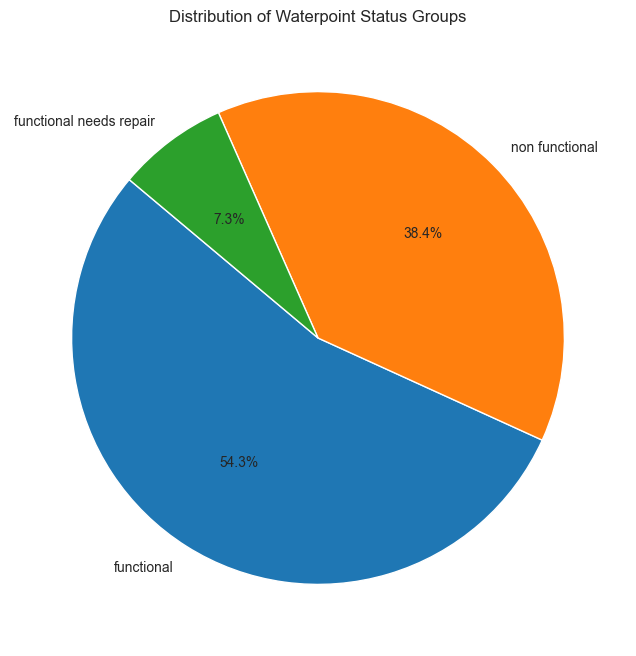

In [18]:
# Completing the data visualization for the merged dataset

# Scatter Plot for Numerical Variables (Longitude vs Latitude)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='longitude', y='latitude', hue='status_group', palette='viridis', alpha=0.6)
plt.title('Geographic Distribution of Waterpoints')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Heatmap for Correlation of Selected Numerical Features
numerical_features = ['amount_tsh', 'gps_height', 'population', 'region_code', 'district_code', 'construction_year']
plt.figure(figsize=(10, 8))
corr_matrix = merged_data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

# Bar Chart for a Categorical Variable (Water Quality)
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='water_quality', hue='status_group', palette='Set2')
plt.title('Water Quality Counts by Status Group')
plt.xticks(rotation=45)
plt.show()

# Pie Chart for Status Group Distribution
status_group_counts = merged_data['status_group'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(status_group_counts, labels=status_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Waterpoint Status Groups')
plt.show()


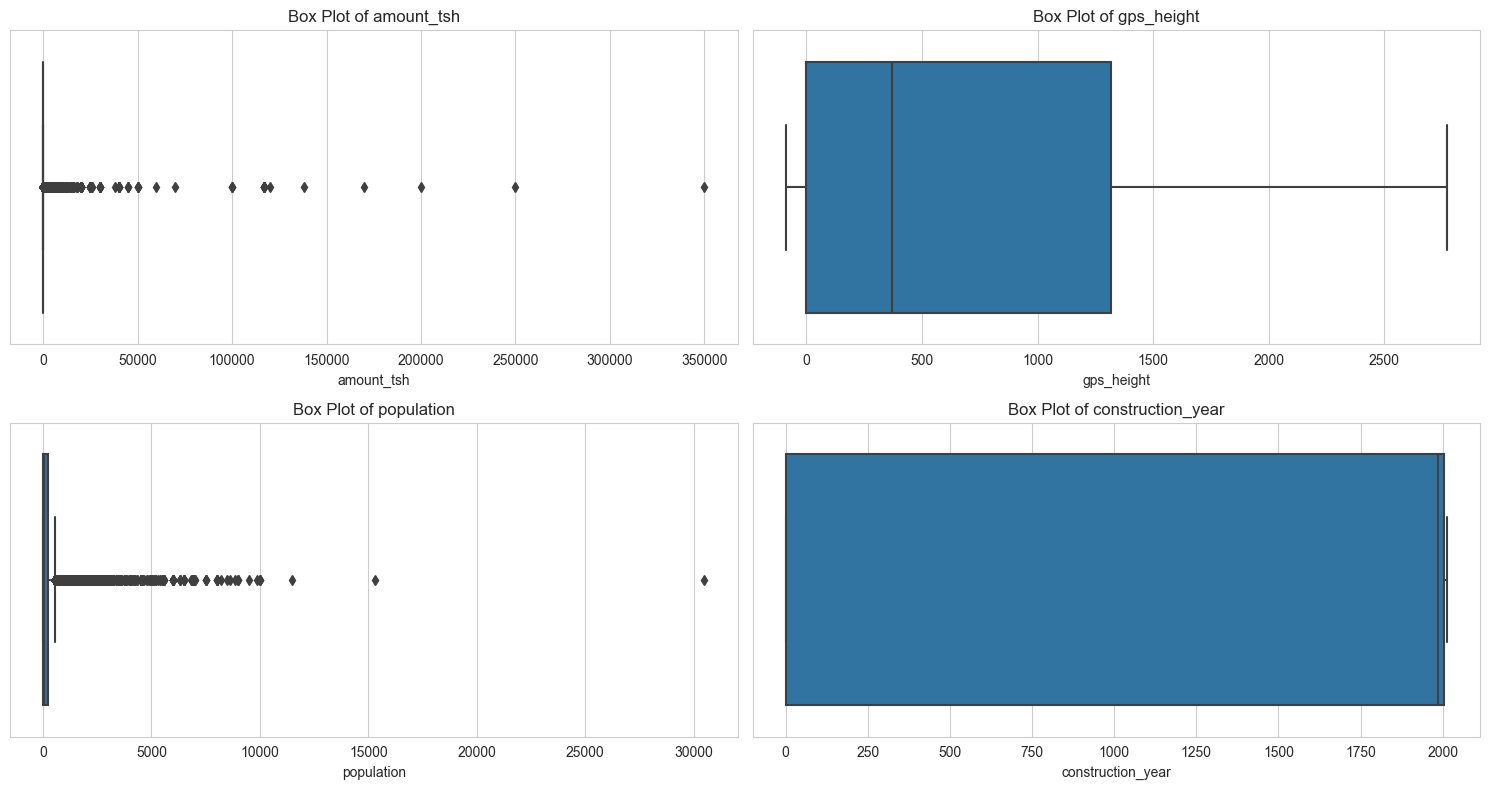

{'amount_tsh': {'Q1': 0.0, 'Q3': 20.0, 'IQR': 20.0, 'Outliers': 11161},
 'gps_height': {'Q1': 0.0, 'Q3': 1319.25, 'IQR': 1319.25, 'Outliers': 0},
 'population': {'Q1': 0.0, 'Q3': 215.0, 'IQR': 215.0, 'Outliers': 4383},
 'construction_year': {'Q1': 0.0, 'Q3': 2004.0, 'IQR': 2004.0, 'Outliers': 0}}

In [16]:
# Selecting a few numerical columns for outlier detection analysis
columns_for_outlier_detection = ['amount_tsh', 'gps_height', 'population', 'construction_year']

# Creating box plots for the selected columns
plt.figure(figsize=(15, 8))

for i, column in enumerate(columns_for_outlier_detection, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=merged_data[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

# Calculating the Interquartile Range (IQR) for the selected columns
iqr_results = {}
for column in columns_for_outlier_detection:
    Q1 = merged_data[column].quantile(0.25)
    Q3 = merged_data[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((merged_data[column] < (Q1 - 1.5 * IQR)) | (merged_data[column] > (Q3 + 1.5 * IQR))).sum()
    iqr_results[column] = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR, 'Outliers': outlier_count}

iqr_results



The box plots and Interquartile Range (IQR) analysis provide insights into the presence of outliers in the selected numerical columns. Here's a summary:

1. **`amount_tsh` (Total Static Head):**
   - **Box Plot:** Shows a large number of points outside the whiskers, indicating many outliers.
   - **IQR Analysis:** Reveals 11,161 outliers. This suggests that there are many values significantly higher than the typical range.

2. **`gps_height` (Elevation of the Waterpoint):**
   - **Box Plot:** Does not indicate significant outliers.
   - **IQR Analysis:** Confirms no outliers, as the data seems to be within a reasonable range.

3. **`population` (Population Around the Waterpoint):**
   - **Box Plot:** Indicates outliers, with several points lying outside the upper whisker.
   - **IQR Analysis:** Identifies 4,383 outliers. This suggests a presence of waterpoints serving unusually large populations.

4. **`construction_year` (Year the Waterpoint was Constructed):**
   - **Box Plot:** No significant outliers are visible.
   - **IQR Analysis:** Indicates no outliers, but it's important to note that a large number of entries have a `construction_year` of 0, which likely indicates missing or unknown values.

### Considerations for Handling Outliers:

- **`amount_tsh` and `population`:** Given the high number of outliers, it's crucial to understand if these outliers represent valid but rare occurrences or if they are due to errors. Depending on this, outliers might be capped, transformed, or removed.
- **`gps_height` and `construction_year`:** No action required for outliers, but the issue of zero values in `construction_year` should be addressed separately, potentially as a missing data problem.
- **Contextual Understanding:** Any decision on handling outliers should be guided by domain knowledge. For instance, very high `amount_tsh` values might be plausible in certain geographical or infrastructural contexts.

Let me know if you would like to proceed with specific outlier handling strategies or continue with other aspects of the exploratory data analysis!

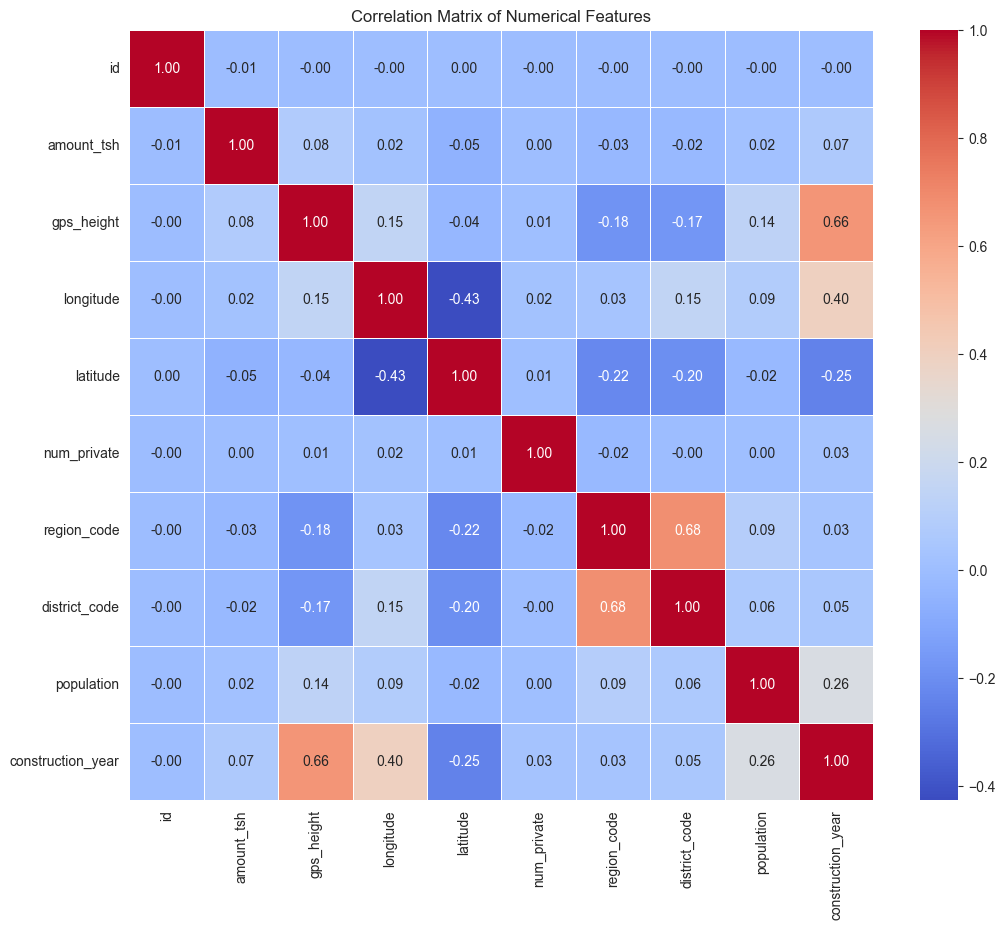

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000


In [19]:
import numpy as np

# Recalculating the correlation matrix for numerical features
correlation_matrix = merged_data.select_dtypes(include=[np.number]).corr()

# Creating a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

correlation_matrix



It seems I forgot to import the NumPy library, which is needed for the correlation analysis. Let me correct that and calculate the correlation matrix again.

The correlation matrix and its corresponding heatmap provide insights into the relationships between numerical features in the dataset. Here are some key observations:

1. **`gps_height` and `construction_year`:**
   - A relatively strong positive correlation of 0.66. This might indicate that newer waterpoints tend to be constructed at higher elevations, or vice versa.

2. **`longitude` and `latitude`:**
   - A negative correlation of -0.43. This is expected as these two features represent geographical coordinates, and in this specific dataset, they seem to vary inversely.

3. **`population` and `construction_year`:**
   - A moderate positive correlation of 0.26. This could suggest that newer waterpoints are built in more populated areas.

4. **`region_code` and `district_code`:**
   - A strong positive correlation of 0.68. This is logical since these codes are likely to be related geographically.

5. **Other Observations:**
   - The `id` column does not show significant correlation with other features, which is expected as it's likely just an identifier.
   - The `num_private` feature shows very low correlation with other features, suggesting it might not be a significant predictor for other variables in this dataset.

### Considerations for Multicollinearity:

- While some correlations are present, they do not appear to be so strong as to indicate serious concerns about multicollinearity, especially in the context of predictive modeling. However, it is still important to be cautious, especially with features like `region_code` and `district_code`.
- In case of predictive modeling, it might be worthwhile to test models both with and without potentially collinear features to assess their impact.

Let me know if you need further analysis or if you'd like to proceed with another aspect of exploratory data analysis!

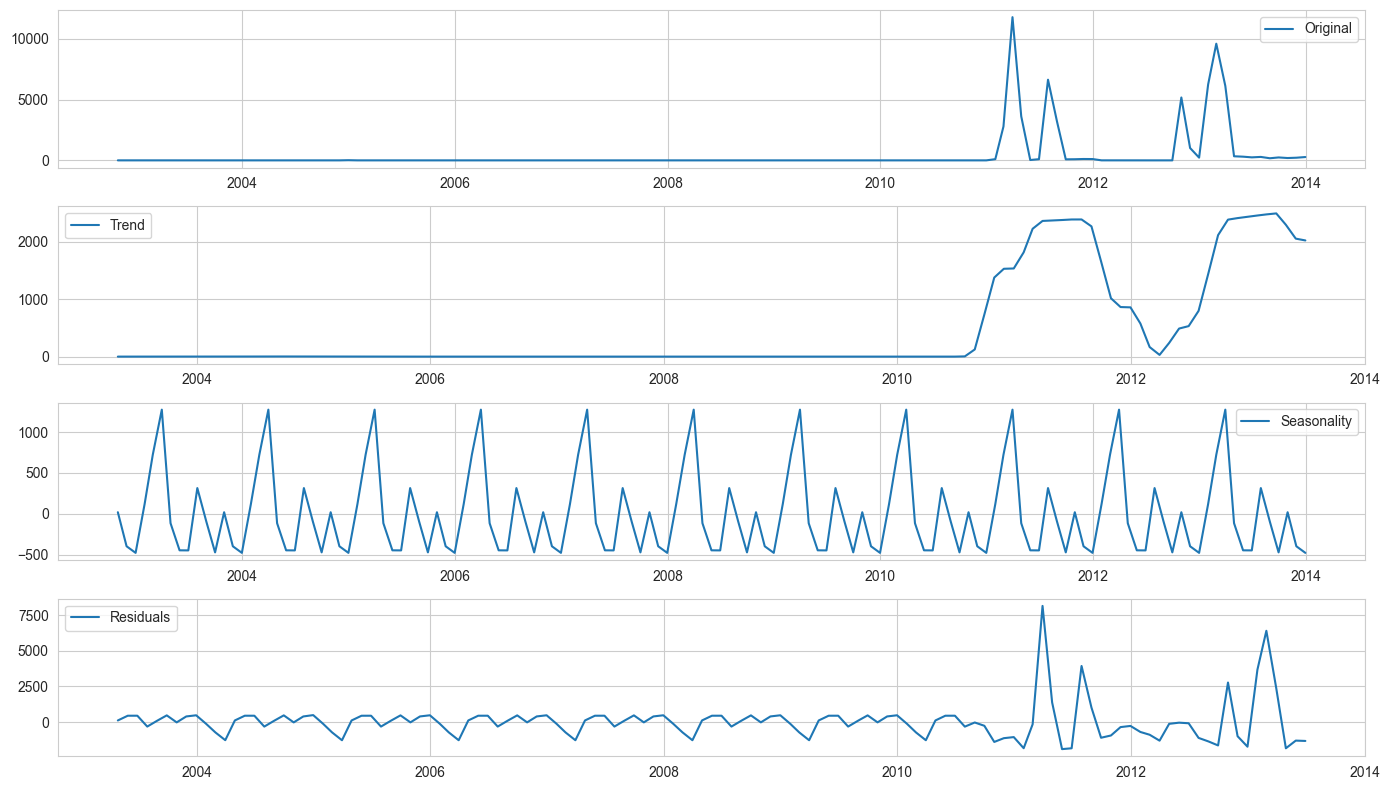

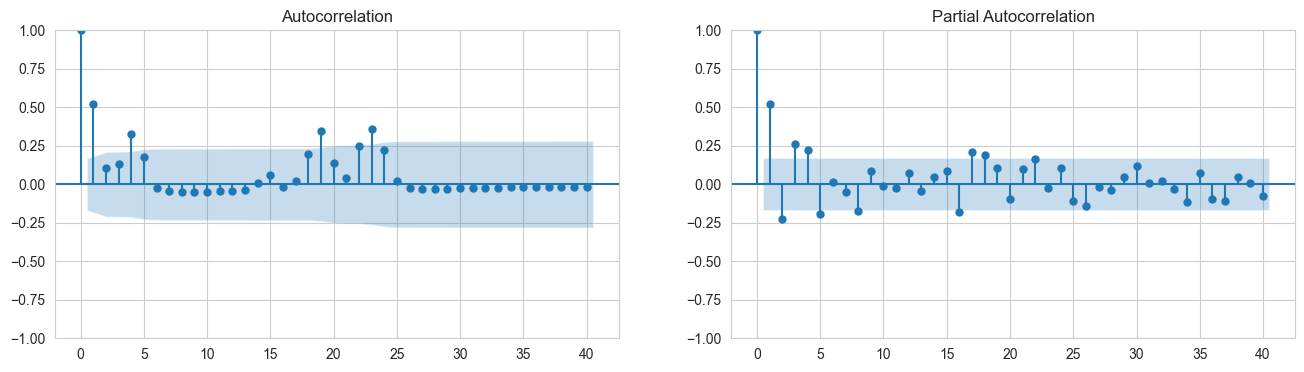

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

# Checking if the 'date_recorded' column can be converted to datetime
merged_data['date_recorded'] = pd.to_datetime(merged_data['date_recorded'])

# Setting 'date_recorded' as the index for time series analysis
merged_data_ts = merged_data.set_index('date_recorded')

# Resampling the data on a monthly basis and counting the number of entries (as an example of aggregation)
monthly_data = merged_data_ts.resample('M').count()['id']

# Performing seasonal decomposition on the monthly data
decomposition = seasonal_decompose(monthly_data, model='additive')

# Plotting the decomposition
plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(monthly_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Plotting Autocorrelation and Partial Autocorrelation plots
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sm.graphics.tsa.plot_acf(monthly_data, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(monthly_data, lags=40, ax=ax[1])
plt.show()


The time series analysis of the `date_recorded` data from the waterpoint dataset reveals several insights:

1. **Time Series Decomposition:**
   - The **original** time series plot shows the count of waterpoint records per month.
   - The **trend** component suggests variations over time, indicating periods with more or fewer waterpoint records.
   - The **seasonal** component shows repeating patterns within each year, suggesting some seasonality in the data.
   - The **residuals** plot indicates the irregular component or noise after removing trend and seasonality.

2. **Autocorrelation Plot (ACF):**
   - Shows how the data points are correlated with each other based on different lag values.
   - The plot indicates significant autocorrelation at various lags, suggesting that past values have a strong influence on future values.

3. **Partial Autocorrelation Plot (PACF):**
   - Highlights the direct relationship between an observation and its lag, removing the effect of intermediate lags.
   - This plot also shows significant correlations at various lags, which are important for understanding the direct effects in the time series.

### Implications and Next Steps:

- **Seasonality & Trend Analysis:** The observed seasonality and trends could be important for understanding patterns in waterpoint functionality or needs over time. This could inform maintenance schedules, resource allocation, etc.
- **Time Series Forecasting:** The autocorrelation and partial autocorrelation findings are critical for building time series forecasting models, such as ARIMA (AutoRegressive Integrated Moving Average), which could predict future activities or needs related to waterpoints.
- **Further Investigation:** Depending on the specific goals, further investigation into the causes of these trends and seasonal patterns could be valuable, such as correlating with weather patterns, local events, or policy changes.

If you have a specific aspect of the time series data you'd like to explore further, such as forecasting or deeper analysis of trends and seasonality, please let me know!